In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import readsav
from scipy.interpolate import interp1d
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from matplotlib import gridspec

from create_spec import create_spec
from fit2gauss import fit2gauss

In [2]:
# import arrays
tube = readsav('/Users/WilliamHenryAshfieldIV/dat/f1.sav',verbose=False,python_dict=False)
frac = readsav('/Users/WilliamHenryAshfieldIV/dat/f4_si_iv_nei.sav',verbose=False,python_dict=False)
log10T,log10G = np.loadtxt('/Users/WilliamHenryAshfieldIV/dat/goft_1403.dat.txt',comments='%',unpack=True)

In [3]:
wav,spec,error = create_spec(tube,frac,log10T,log10G,time=200) #350 -> single

/Users/WilliamHenryAshfieldIV/synth_spec/create_spec.py:98: RuntimeWarning: invalid value encountered in true_divide
  factor = nei/eqi


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


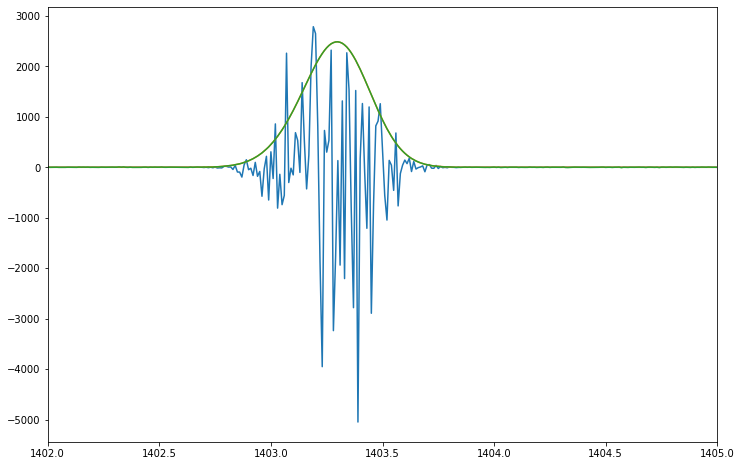

In [4]:
plt.figure(figsize=(12,8))
plt.plot(wav,error)
plt.xlim(1402,1405)

errorII = np.sqrt(spec)
np.nan_to_num(errorII, copy=False, nan=0)
plt.plot(wav,errorII)

rando = np.random.randn(2000)*0.001*np.max(errorII) # add small amount of noize to zero-ish values
too_small = np.where(errorII < 0.01*np.max(errorII))
errorII[too_small] += rando[too_small]

plt.plot(wav,errorII)

In [5]:
#noise = np.full(2000,0.001)
res = fit2gauss(wav,spec,errorII,verbose=True)

a2g[0] = -1186251.2643891913
a1g[0] = 6163090.751810903
chi2g =  630.2273820231242
a2g =  [6.16309075e+06 1.40329373e+03 1.06615275e-01 0.00000000e+00
 1.40329373e+03 1.06615275e-01]
chi1g =  3641.435707143556
chi2g =  -1.0


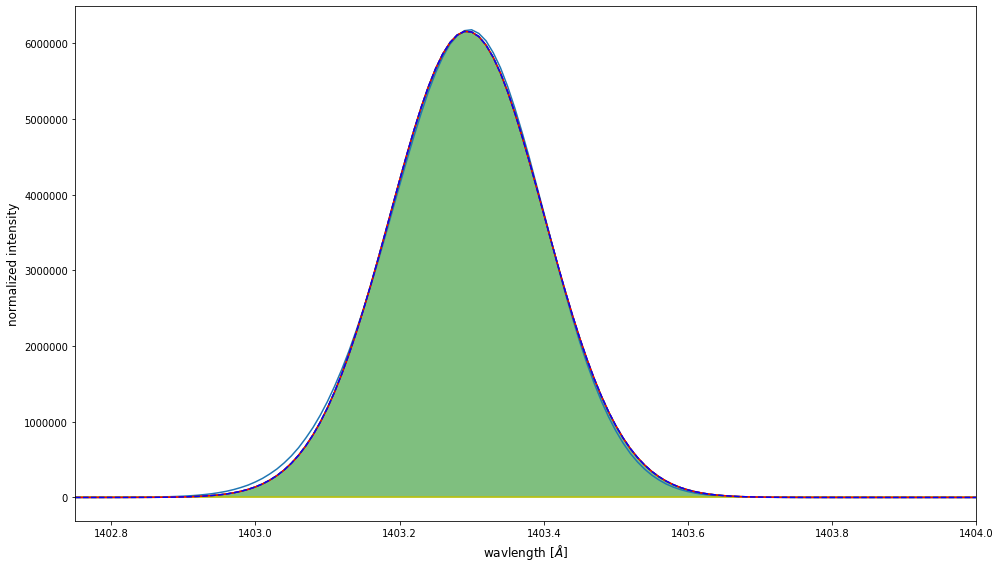

In [6]:
# extract arrays
y2a = res["y2a"]
y2b = res["y2b"]
y1g = res["y1g"]

#plot 
fig = plt.figure(figsize=(14,8))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

# spectra
ax1.plot(wav, spec)

# peak 1
ax1.plot(wav, y2a, "g")
ax1.fill_between(wav, y2a.min(), y2a, facecolor="green", alpha=0.5)
  
# peak 2
ax1.plot(wav, y2b, "y")
ax1.fill_between(wav, y2b.min(), y2b, facecolor="yellow", alpha=0.5) 

#both
ax1.plot(wav,y2a+y2b, "r")

# single fit
ax1.plot(wav,y1g,'b--')
    
plt.xlim(1402.75,1404)
ax1.set_xlabel("wavlength [$\AA$]",  fontsize=12)
ax1.set_ylabel("normalized intensity",  fontsize=12)
fig.tight_layout()

In [7]:
a1g = res["a1g"]
a2g = res["a2g"]

line = 1403
l1 = a2g[1]
l2 = a2g[4]
v1 = (l1-line)/line*3e5
v2 = (l2-line)/line*3e5


print('red velocity = ',v1,'-----', '"blue" velocity = ', v2)

red velocity =  62.806500891276656 ----- "blue" velocity =  62.806500891276656


In [8]:
# single Gaussian
line = 1403
l1 = a1g[1]
v1 = (l1-line)/line*3e5
print('red velocity = ',v1)

red velocity =  62.806500891276656


In [9]:
sig = a2g[5]
c = 300
line = 1402.77
freq = c/line*1e3
v_width = sig*freq
print('line width = ', v_width)

line width =  22.80101695952371
